<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem3/blob/main/nlp_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
from google.colab import drive
import random
import numpy as np
import pandas as pd
import gzip
import nltk
from nltk import *
from nltk.corpus import webtext, stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from operator import itemgetter
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
import textblob
from textblob import TextBlob
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [200]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [201]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF("/content/gdrive/MyDrive/reviews_Apps_for_Android_5.json.gz")

In [202]:
df.shape

(752937, 9)

In [203]:
df = df.sample(n=100)

In [204]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
623224,AFKTOPJ7BDWWR,B00DUZKE4O,BadLlama,"[0, 0]",Fun game but lots of typing. Haven't been play...,3.0,Fun but lots of typing,1374969600,"07 28, 2013"
743751,A3TMGWQI5O6KM9,B00JF8Z1NO,Janey Felton,"[0, 0]",This is fast paced so it makes it a great game...,5.0,great game,1404259200,"07 2, 2014"
60888,A1L3EKKZFI4D1N,B004US21IW,jimbocolumbus,"[4, 5]","Downloaded just for fun, but I got tired of it...",3.0,HTC EVO V 4g 3d downloaded just for fun,1369440000,"05 25, 2013"
215714,A3RC1I7RWGZ9OY,B0073LWEXK,k c,"[0, 0]",had a great time trying to figure this one out...,5.0,loved it,1330387200,"02 28, 2012"
169059,A2J0KSILFKOA5G,B006CZ4238,Mike,"[4, 11]",Its rare that I get frustrated with Amazon but...,1.0,Seriously...5$ for this?,1341792000,"07 9, 2012"


In [205]:
def preprocessing(text):
  text = re.sub("[^-9A-Za-z ]", "", text).lower()
  stop = stopwords.words("english")
  tokens = [word for word in (token for token in word_tokenize(text)) if word not in stop]
  lmtzr = nltk.WordNetLemmatizer()
  preprocessed_text = ' '.join([lmtzr.lemmatize(word) for word in tokens])
  return preprocessed_text

In [206]:
df['reviewText'] = df['reviewText'].astype(str)
df['reviewText'] = df['reviewText'].apply(preprocessing)

In [207]:
text = list(df['reviewText'])

In [208]:
print(text[0:30])

['fun game lot typing havent playing long would rated higher incentive play', 'fast paced make great game pas time find problem game', 'downloaded fun got tired uninstalled complaining wasnt anymore', 'great time trying figure one hope come lost city dont mind object finding game acut rest', 'rare get frustrated amazon whole refund apps thing bit ridiculous app cost suck bad graphic ok control ridiculous dont waste like app suck', 'like cat usually game cat naught naught favorite although game smooth colorful crisp clear objective made game repetitive definitely wouldnt paid glad faotd', 'love game much funniest coolest cutest game ever play love sound monster fun sing along dont care mom think noise annoying keep singing downside nothing game app store need update see friend island witch desperately want app store wont let instead saying quotupdatequot say quotopenquot cant update nooo beside game flawless fun extremely addictive awesome highly recommend getting game best one big blue

In [209]:
words = [i for item in text for i in item.split()]

In [210]:
print(words[:10])

['fun', 'game', 'lot', 'typing', 'havent', 'playing', 'long', 'would', 'rated', 'higher']


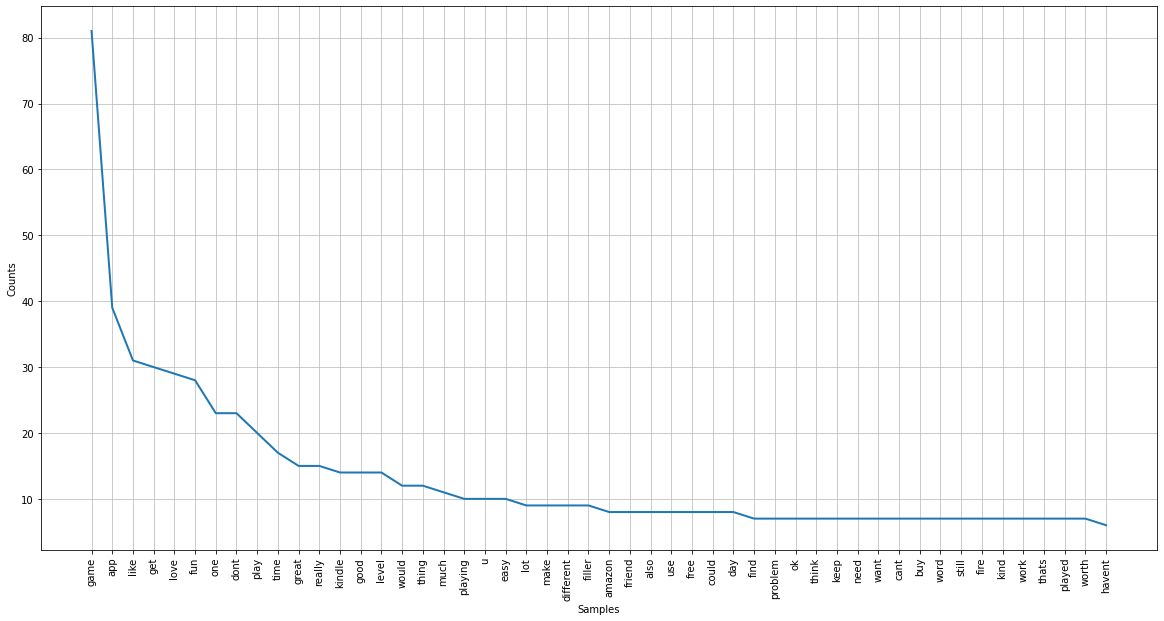

In [211]:
plt.figure(figsize=(20, 10)) 
nlp_words = nltk.FreqDist(words)
nlp_words.plot(50)

In [212]:
esBigrams = ngrams(words, 3)
esBigramFreq = collections.Counter(esBigrams)

In [213]:
esBigramFreq.most_common(10)

[(('filler', 'filler', 'filler'), 7),
 (('fun', 'fast', 'paced'), 2),
 (('game', 'kindle', 'fire'), 2),
 (('kindle', 'fire', 'hd'), 2),
 (('everyone', 'get', 'app'), 2),
 (('solve', 'math', 'problem'), 2),
 (('app', 'well', 'worth'), 2),
 (('like', 'super', 'mario'), 2),
 (('super', 'mario', 'bros'), 2),
 (('fun', 'game', 'lot'), 1)]

In [214]:
df['tokenized_review'] = df.apply(lambda i:  nltk.word_tokenize(i['reviewText']), axis=1)
df['POS_Tags'] = df.apply(lambda i: nltk.pos_tag(i['tokenized_review']), axis=1)

In [215]:
def adjectives(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag == 'JJ']
def verbs(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('VB')]
def adverbs(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('RB')]
def nouns(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('NN')]

In [216]:
df['Adjectives'] = df['reviewText'].apply(adjectives)
df['Verbs'] = df['reviewText'].apply(verbs)
df['Adverbs'] = df['reviewText'].apply(adverbs)
df['Nouns'] = df['reviewText'].apply(nouns)

In [217]:
df.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,tokenized_review,POS_Tags,Adjectives,Verbs,Adverbs,Nouns
623224,AFKTOPJ7BDWWR,B00DUZKE4O,BadLlama,"[0, 0]",fun game lot typing havent playing long would ...,3.0,Fun but lots of typing,1374969600,"07 28, 2013","[fun, game, lot, typing, havent, playing, long...","[(fun, NN), (game, NN), (lot, NN), (typing, VB...",[havent],"[typing, rated]",[long],"[fun, game, lot, playing, incentive, play]"


In [218]:
def POS_freq(words):
  POS = list(words)
  POS = [y for x in POS for y in x]
  plt.figure(figsize=(20, 10)) 
  nlp_words = nltk.FreqDist(POS)
  nlp_words.plot(50)

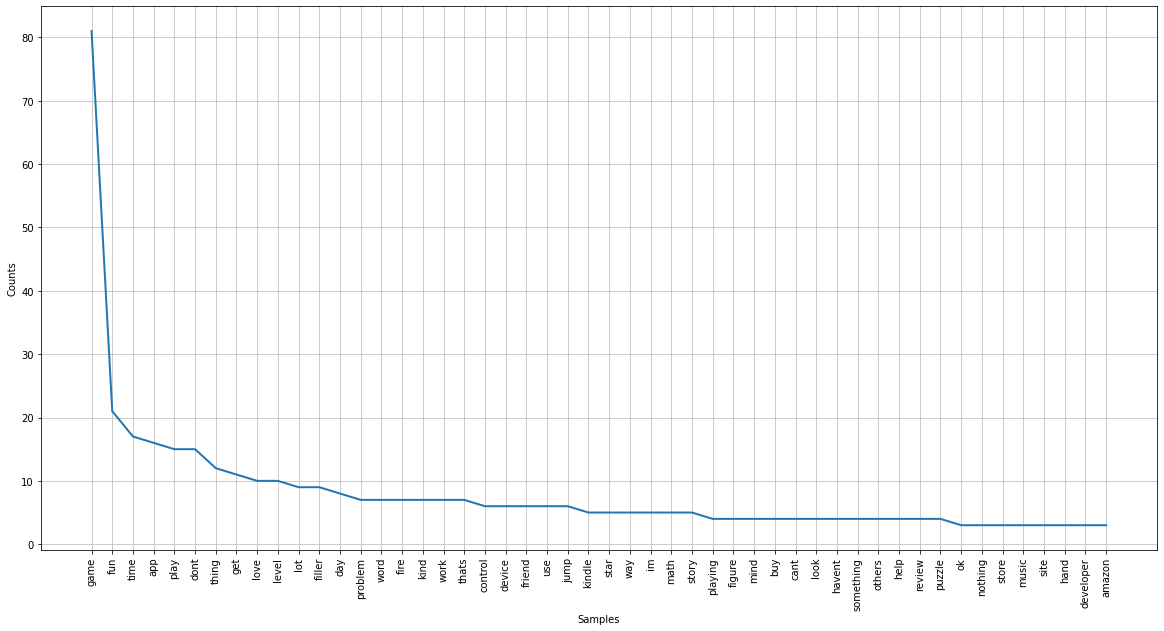

In [219]:
POS_freq(df['Nouns'])

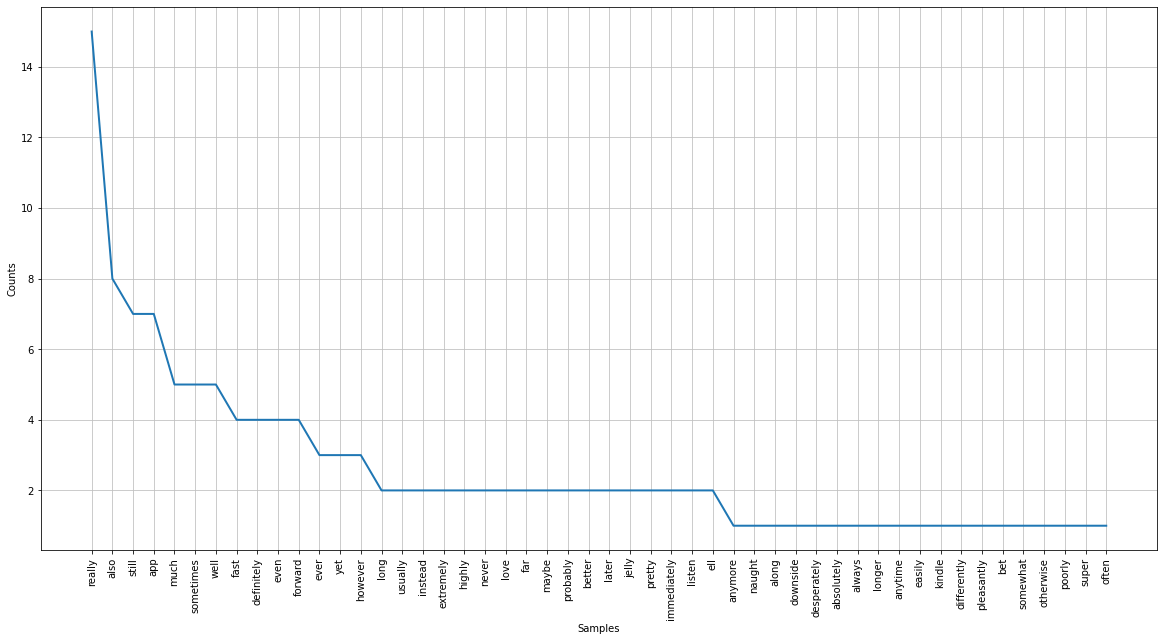

In [220]:
POS_freq(df['Adverbs'])

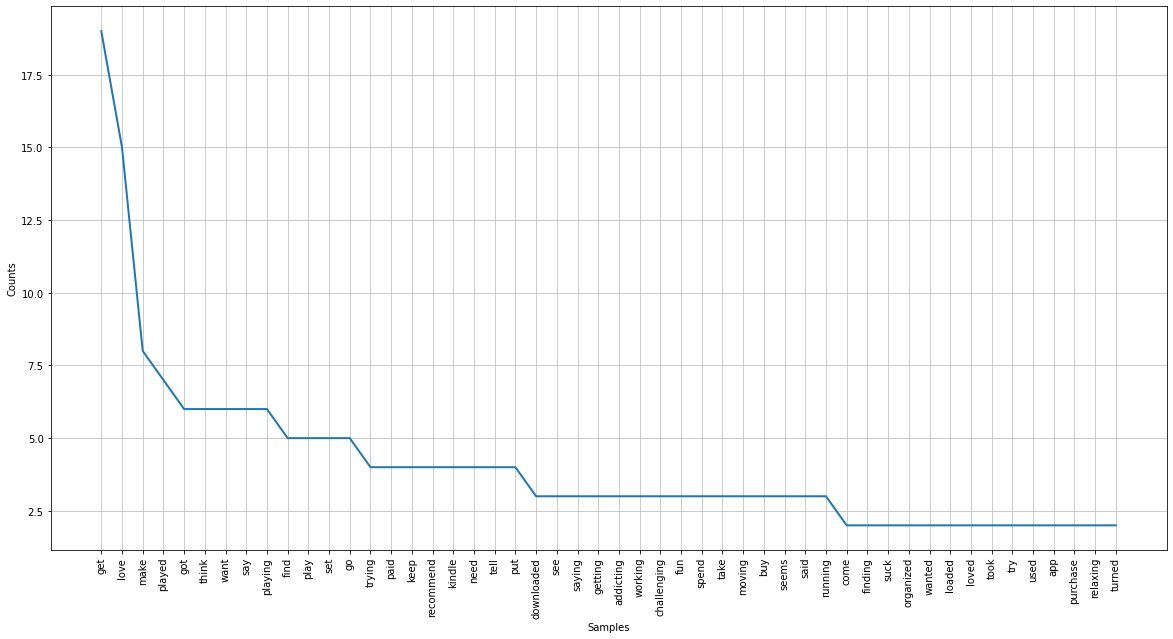

In [221]:
POS_freq(df['Verbs'])

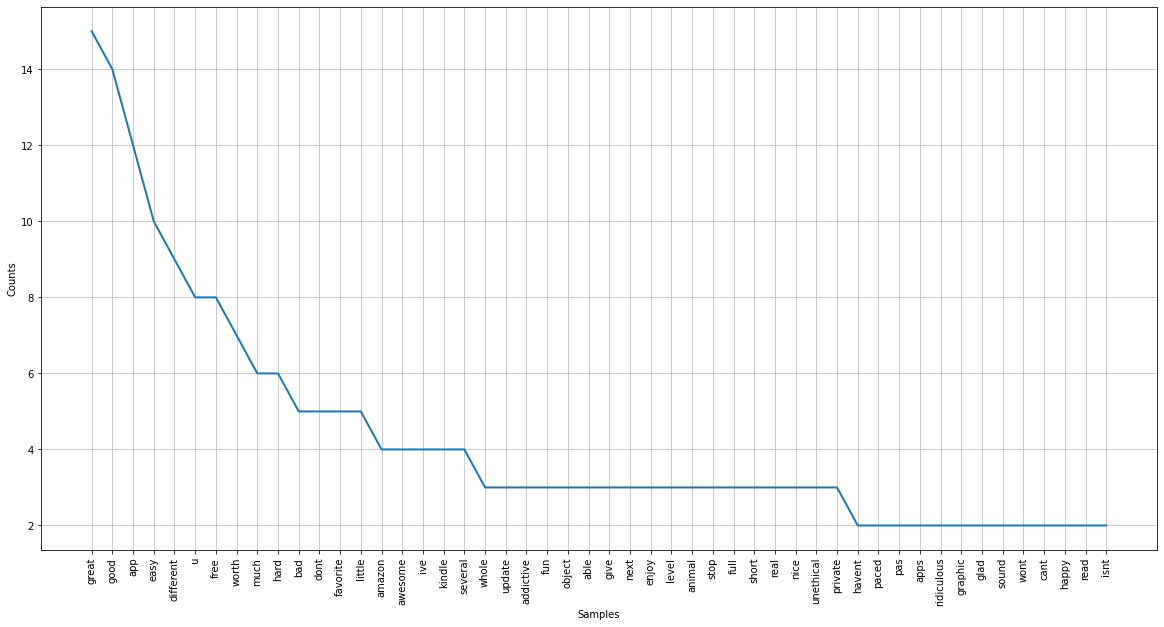

In [222]:
POS_freq(df['Adjectives'])

In [223]:
NER = spacy.load("en_core_web_sm")

In [224]:
named_entities = []
for sentence in text:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = NER(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [225]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:100]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
Entity Name,one,app,amazon,today,first,mario bros,two,five,july,every day,ell,donkey kong,downloadwas,earphone,four,eden,five minute,day,zombie,bookmark highlight journal,control button jump button,google,app worthless u amazon,app vacation,app us,app time,app ok,app day,app app,android device longer working client fulfills ...,amazon app,almost december,99 cent,ge,howard,gps,quot,year old,webmd message board,ur tongue pull u inside,tuesday,three,thirty minute,third,ten,snooze morning twenty year,several hour,s,quotwait,penny,half hour,password kindle,one amazon listens one,nooo,next week,monay,love songgo,long press,like minute one,kinda hard fun,israeli air force yom,instagram,yetconsa lot,99
Entity Type,CARDINAL,ORG,ORG,DATE,ORDINAL,PERSON,CARDINAL,CARDINAL,DATE,DATE,ORG,GPE,PERSON,ORG,CARDINAL,LOC,TIME,DATE,PERSON,ORG,ORG,ORG,ORG,PERSON,GPE,ORG,ORG,DATE,PERSON,ORG,PERSON,DATE,MONEY,ORG,PERSON,ORG,PERSON,DATE,ORG,ORG,DATE,CARDINAL,TIME,ORDINAL,CARDINAL,DATE,TIME,PRODUCT,PERSON,PERSON,TIME,PERSON,CARDINAL,NORP,DATE,GPE,PERSON,ORG,CARDINAL,PERSON,ORG,NORP,PERSON,CARDINAL
Frequency,12,10,5,3,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [226]:
def key_words(n):

  kwargs = {
            'ngram_range': (1, 2), 
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word', 
            'min_df': 2,
    }
  vectorizer = TfidfVectorizer(**kwargs)
  tfidf_matrix = vectorizer.fit_transform(df['reviewText'])
  important_words_indices = np.argsort(np.asarray(tfidf_matrix.sum(axis=0))[0])[::-1]
  tfidf_feature_names = np.array(vectorizer.get_feature_names())
  print(tfidf_feature_names[important_words_indices[:n]])
  importance = np.asarray(tfidf_matrix.sum(axis=0))[0]
  plt.figure(figsize=(20, 10))
  plt.plot(tfidf_feature_names[important_words_indices[:n]], importance[important_words_indices[:n]])
  plt.xticks(rotation = 45)
  plt.xlabel("Key Words")
  plt.ylabel("Importance")
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['game' 'love' 'app' 'get' 'like' 'fun' 'play' 'one' 'dont' 'time' 'great'
 'really' 'kindle' 'good' 'level' 'playing' 'thing' 'lot' 'much' 'would'
 'easy' 'free' 'use' 'played' 'also' 'want' 'way' 'different' 'keep'
 'fire']


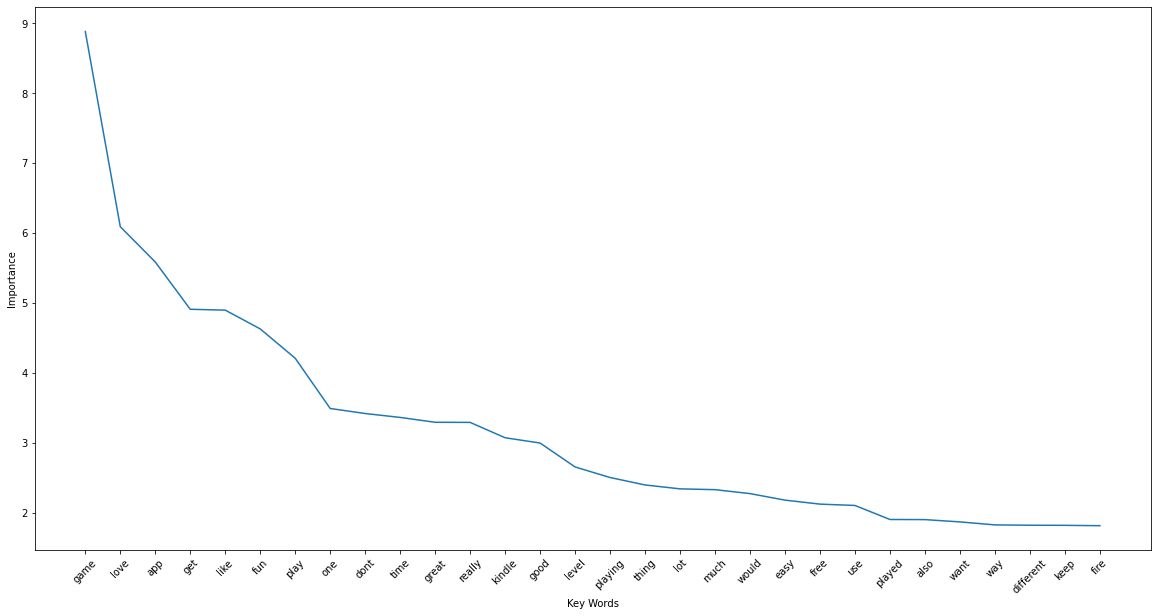

In [227]:
key_words(30)

In [228]:
def rank_vs_freq():
  frequency = {}
  rank = 1
  
  for word in words:
    count = frequency.get(word , 0)
    frequency[word] = count + 1
  df1 = pd.DataFrame(columns = ['Rank', 'Frequency'])

  for word , freq in sorted(frequency.items(), key=itemgetter(1), reverse = True):
    df1.loc[word] = [rank, freq]
    rank = rank + 1

  plt.figure(figsize=(20,20)) 
  plt.plot(df1['Rank'], df1['Frequency']) 
  plt.ylabel("Frequency")
  plt.xlabel("rank")
  plt.xticks(rotation=45)    
  plt.show()

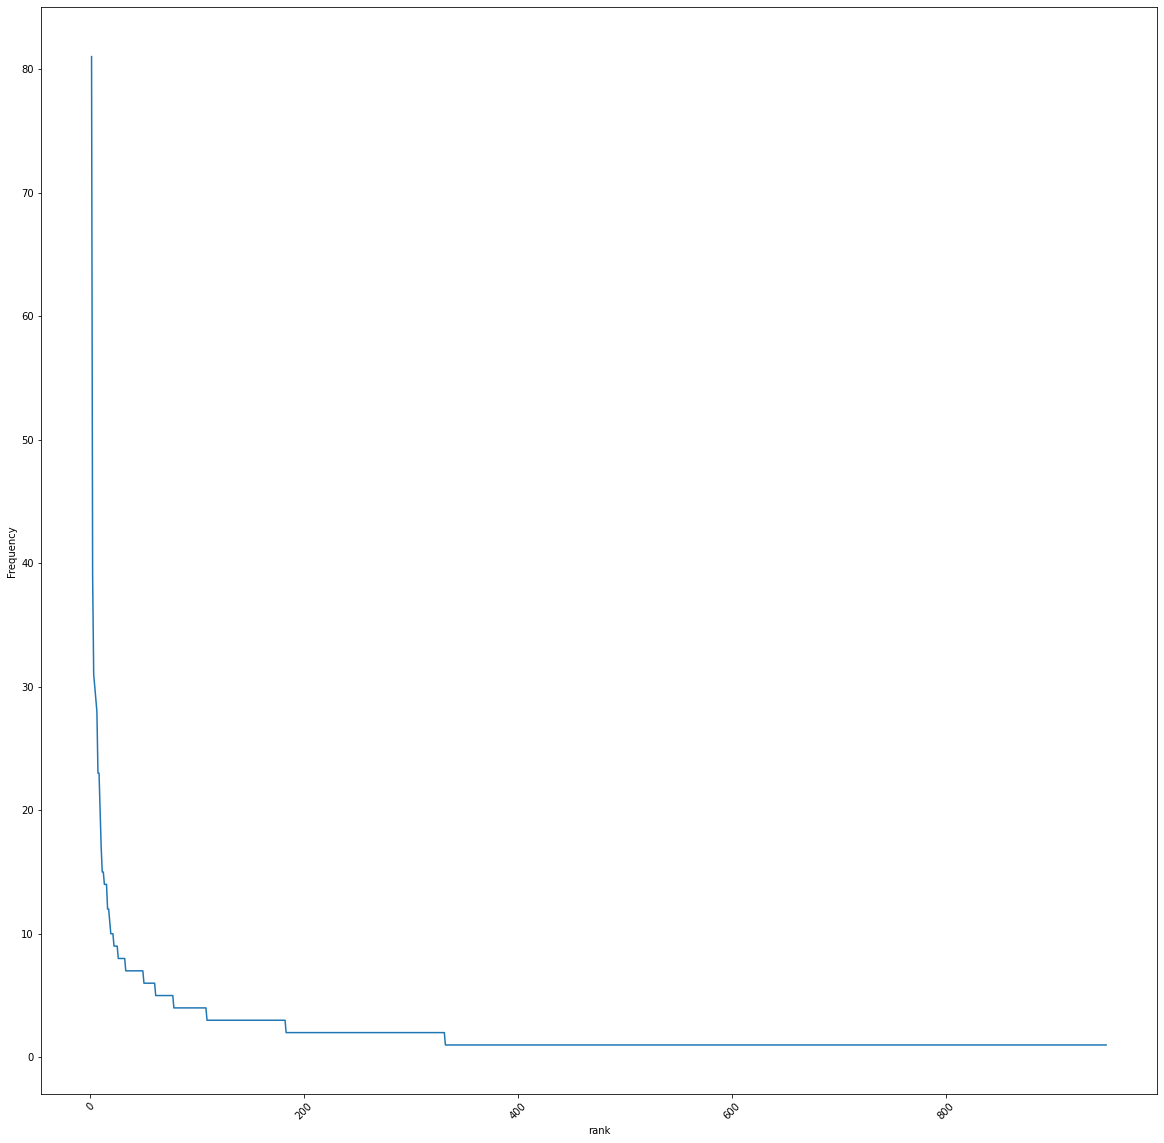

In [229]:
rank_vs_freq()